<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import os

import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

import seaborn as sns
sns.set_context('notebook', font_scale=1.5)
sns.set_style('darkgrid', rc={'ytick.left':True, 'ytick.direction':'in',
                              'xtick.bottom':True, 'xtick.direction':'in'})

# from sklearn.metrics import mean_absolute_error as mae
# from sklearn.metrics import make_scorer

# from sklearn.preprocessing import StandardScaler

# # from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor

# sns.set_style('dark')

In [2]:
def get_data(filename):
    
    """
    Reads the data from the given path.
    """

    pth1 = f'/datasets/{filename}'
    pth2 = f'data/{filename}'

    if os.path.exists(pth1):
        df = pd.read_csv(pth1)
        print(f'Reading {pth1}...')
    elif os.path.exists(pth2):
        df = pd.read_csv(pth2)
        print(f'Reading {pth2}...')
    else:
        print('Check the file path')

    return df

In [3]:
data_path = 'insurance.csv'

init_df = get_data(data_path)

df = init_df.copy()

# Переименовываю колонки для удобства обращения
df.columns = ['gender', 'age', 'salary', 'family_members', 'ins_payments']

df

Reading data/insurance.csv...


,gender,age,salary,family_members,ins_payments
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [4]:
print(f'Продублировано объектов:{df.duplicated().sum() / len(df): .1%}')

# Избавляюсь от дубликатов
df = df.drop_duplicates()
print('Дубликаты удалены')

Продублировано объектов: 3.1%
Дубликаты удалены


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          4847 non-null   int64  
 1   age             4847 non-null   float64
 2   salary          4847 non-null   float64
 3   family_members  4847 non-null   int64  
 4   ins_payments    4847 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 227.2 KB


In [6]:
df['age'] = df['age'].astype(int)
df['salary'] = df['salary'].astype(int)
print('Типы данных изменены')

Типы данных изменены


/var/folders/nc/53ydtkz56jj83586jxv6mvlm0000gn/T/ipykernel_40312/1057377011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].astype(int)
/var/folders/nc/53ydtkz56jj83586jxv6mvlm0000gn/T/ipykernel_40312/1057377011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary'] = df['salary'].astype(int)


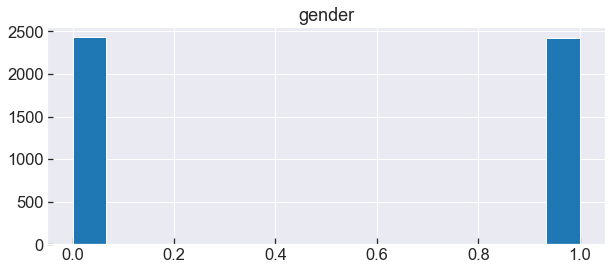

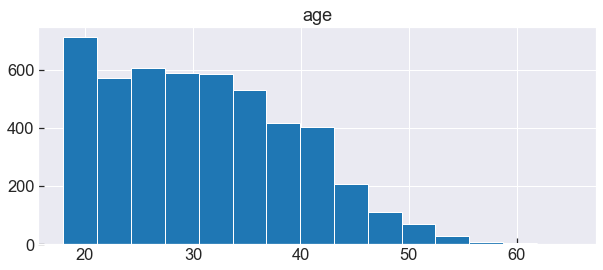

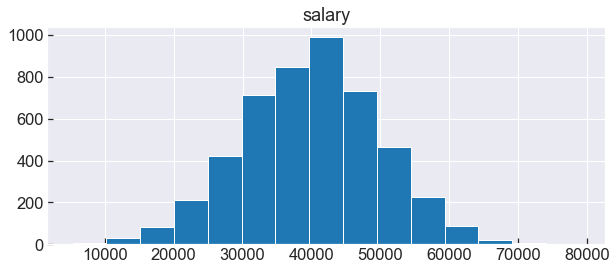

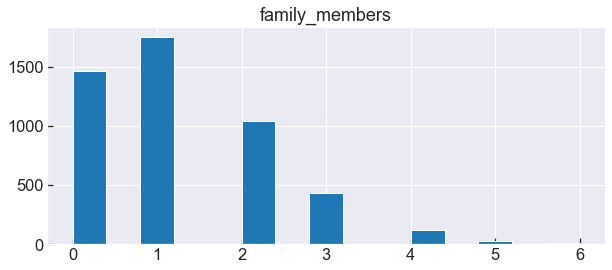

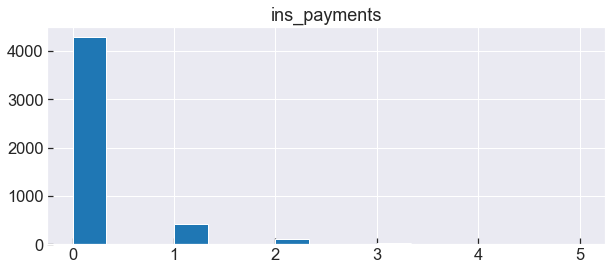

In [7]:
for col in df.columns:

    plt.figure(figsize=(10,4))
    plt.hist(df[col], bins=15)
    plt.title(col)

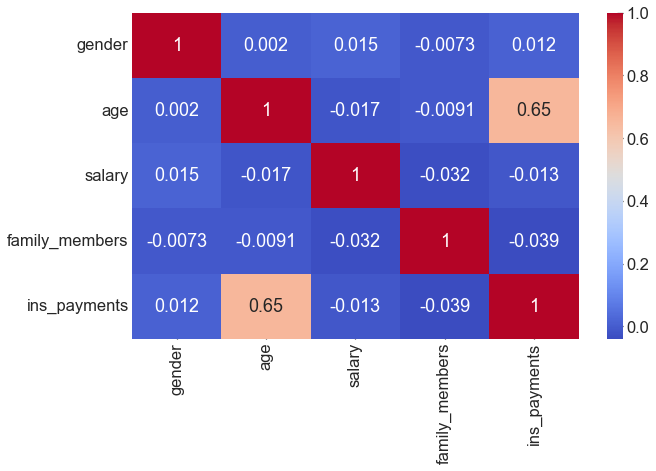

In [8]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

plt.show()

- Пропуски и выборосы отсутствуют
- Дубликаты удалены
- Типы данных изменены
- Между целевой переменной и признаком `age` есть значительная положительная корреляция (коэффициент 0.65)

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Умножение признаков на обратимую матрицу не влияет на качество линейной регрессии.

**Обоснование:**

$$
a = Xw = X(X^T X)^{-1} X^T y
$$

Пусть $P$ $-$ обратимая матрица. Произведем замену: $X \rightarrow XP$.

$$
b = XP\{(XP)^T XP\}^{-1} (XP)^T y
$$

Доказать: $b = a$.

Свойства: $(AB)^{-1} = B^{-1} A^{-1}$, $(AB)^T = B^T A^T$
$$
\begin{align}
b &= XP\{(XP)^T XP\}^{-1} (XP)^T y \\
b &= XP\{P^T (X^T X) P\}^{-1} (XP)^T y \\
b &= XP P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y \\
b &= X(X^T X)^{-1} X^T y \\
b &= a \\
\blacksquare
\end{align}
$$

<!-- $\$ -->

<div class="alert alert-block alert-warning">
<b>Вопрос:</b> Не нашел, как отключать нумерацию уравений в формулах. Не подскажешь?
</div>

## Алгоритм преобразования

**Алгоритм**

- Сгенерировать случайную обратимую матрицу $P$ размерности $n \times n$, где $n$ — количество признаков
- Зашифровать признаки $F$, скалярно перемножив их с матрицей $P$: $F^* = F \cdot P$
- Обучить модель линейной регрессии и вычислить ее качество
- Для восстановления признаков в исходном виде перемножить их с обратной матрицей: $F = F^* \cdot P^{-1}$

**Обоснование**

Аналитическое обоснование: см. пункт "Умножение матриц"

Практическая проверка: см. пункт "Проверка алгоритма"

***

## Проверка алгоритма

In [9]:
from sklearn.metrics import r2_score
from numpy.linalg import inv
from sklearn.model_selection import train_test_split

In [10]:
# В задании сказано, что нужно пользоваться моделью из sklearn, но так гораздо интереснее
# Надеюсь, что решение будет засчитано как эквивалентное
class LinearRegression:
    def fit(self, train_features, train_target):
        """
        Linear regression using least squares solution

        Args:
            train_features (_type_): features for training
            train_target (_type_): target for training
        """        
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = inv(X.T @ X) @ X.T @ y # sklearn gradient -- тот же результат?
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [11]:
features = df.drop('ins_payments', axis=1)
target = df['ins_payments']

In [12]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(features_train, target_train)

predictions_test = model.predict(features_test)
R2_test = r2_score(target_test, predictions_test)
print(f'Коэффициент детерминации для модели, обученной на признаках в исходном виде составляет {R2_test:.2f} на тестовой выборке')

Коэффициент детерминации для модели, обученной на признаках в исходном виде составляет 0.44 на тестовой выборке


In [13]:
# Квадратная матрица случайных значений, сгенерированных нормальным распределением.
# Количество столбцов соответствует количеству признаков.
np.random.seed(42)
sqr_matrix = np.random.normal(size=[4, 4])

sqr_matrix

array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986],
       [-0.23415337, -0.23413696,  1.57921282,  0.76743473],
       [-0.46947439,  0.54256004, -0.46341769, -0.46572975],
       [ 0.24196227, -1.91328024, -1.72491783, -0.56228753]])

In [14]:
# Проверка на обратимость
inv_sqr_matrix = inv(sqr_matrix)
np.round(sqr_matrix @ inv_sqr_matrix, 0)

array([[ 1.,  0., -0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [-0., -0.,  1., -0.],
       [ 0.,  0., -0.,  1.]])

In [15]:
# Шифрование признаков
features_coded = features @ sqr_matrix

features_coded

,0,1,2,3
0,-23294.791154,26899.327002,-22921.847067,-23067.770211
1,-17850.555758,20604.598076,-17538.953455,-17662.990926
2,-9865.752553,11386.970944,-9685.974377,-9758.069218
3,-19581.515190,22616.010381,-19294.804157,-19405.939170
4,-12259.341053,14154.123038,-12050.336135,-12132.535366
...,...,...,...,...
4995,-16766.307948,19359.011161,-16503.243510,-16606.188605
4996,-24608.177075,28420.272347,-24231.118785,-24378.708594
4997,-15919.380826,18384.276178,-15681.725366,-15774.014527
4998,-15355.741193,17730.684307,-15123.542938,-15212.643210


In [19]:
# Качество модели, обученной на зашифрованных признаках
features_train_coded, features_test_coded, target_train, target_test = train_test_split(
    features_coded, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(features_train_coded, target_train)

predictions_test_coded = model.predict(features_test_coded)
R2_test_coded = r2_score(target_test, predictions_test_coded)
print(f'Коэффициент детерминации для модели, обученной на зашифрованных признаках составляет {R2_test_coded:.2f} на тестовой выборке')

Коэффициент детерминации для модели, обученной на зашифрованных признаках составляет 0.44 на тестовой выборке


$\rm{R2 (test) = R2 (test\ coded)} \blacksquare$

### Восстановление признаков

In [17]:
features_recovered = np.round(features_coded @ inv_sqr_matrix, 0)

features_recovered.columns = ['gender', 'age', 'salary', 'family_members']

features_recovered.head()

,gender,age,salary,family_members
0,1.0,41.0,49600.0,1.0
1,-0.0,46.0,38000.0,1.0
2,-0.0,29.0,21000.0,-0.0
3,-0.0,21.0,41700.0,2.0
4,1.0,28.0,26100.0,-0.0


In [18]:
features.head()

,gender,age,salary,family_members
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования